In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from kneed import KneeLocator
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("movies_2026.csv", encoding="latin-1")
print(df.shape)
df.head()

(19883, 28)


,id,budget,genres,homePage,productionCompany,productionCompanyCountry,productionCountry,revenue,runtime,video,...,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount,releaseYear
0,1627085,0.0,Drama|Crime,NaN,NaN,NaN,NaN,0.0,95,False,...,2026-02-01,0.0,0,2,0,0,8,2.0,5.0,2026.0
1,1626914,0.0,Animation,NaN,NaN,NaN,NaN,0.0,3,False,...,2026-02-01,0.0,0,1,0,0,4,0.0,0.0,2026.0
2,1626898,0.0,Animation,NaN,NaN,NaN,NaN,0.0,2,False,...,2026-02-01,0.0,0,1,0,0,3,0.0,0.0,2026.0
3,1626808,0.0,Thriller|Mystery|Documentary,NaN,NaN,NaN,NaN,0.0,5,False,...,2026-02-01,0.0,0,3,0,0,7,0.0,0.0,2026.0
4,1626678,0.0,Animation,NaN,NaN,NaN,NaN,0.0,12,False,...,2026-02-01,0.0,0,1,0,0,3,0.0,0.0,2026.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19883 entries, 0 to 19882
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         19883 non-null  int64  
 1   budget                     19883 non-null  float64
 2   genres                     17918 non-null  object 
 3   homePage                   5607 non-null   object 
 4   productionCompany          14223 non-null  object 
 5   productionCompanyCountry   11473 non-null  object 
 6   productionCountry          16009 non-null  object 
 7   revenue                    19883 non-null  float64
 8   runtime                    19883 non-null  int64  
 9   video                      19397 non-null  object 
 10  director                   18907 non-null  object 
 11  actors                     17282 non-null  object 
 12  actorsPopularity           17275 non-null  object 
 13  actorsCharacter            17048 non-null  obj

In [22]:
df.describe()

,id,budget,revenue,runtime,popularity,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount,releaseYear
count,1.988300e+04,1.988300e+04,1.988300e+04,19883.000000,19883.000000,19883.000000,19883.000000,19883.000000,19883.000000,19883.000000,19883.000000,19846.000000,19721.000000,19881.000000
mean,9.022402e+05,9.413280e+06,2.879213e+07,66.093799,26.248842,3.837069,675.927325,1.949253,1.972539,1.230247,1082.049640,3516.505996,8224.352061,2016.827222
std,6.848978e+05,2.774781e+07,1.109805e+08,50.089055,156.067177,3.397705,1938.194656,1.256225,2.312075,2.244688,26402.818732,47768.661984,71257.943156,12.838005
min,5.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1902.000000
25%,1.462195e+05,0.000000e+00,0.000000e+00,10.000000,0.054600,0.000000,0.000000,1.000000,0.000000,1.000000,3.000000,0.000000,0.000000,2013.000000
50%,8.696230e+05,0.000000e+00,0.000000e+00,86.000000,8.502000,5.400000,6.000000,2.000000,1.000000,1.000000,9.000000,2.000000,3.000000,2021.000000
75%,1.589602e+06,1.000000e+06,3.306335e+05,103.000000,22.239000,6.800000,423.000000,3.000000,3.000000,1.000000,21.000000,6.000000,12.000000,2025.000000
max,1.627166e+06,3.800000e+08,2.847246e+09,750.000000,11474.647000,10.000000,30788.000000,16.000000,89.000000,155.000000,919590.000000,922162.000000,922017.000000,2026.000000


In [23]:
numeric_vars = ['budget', 'revenue', 'runtime', 'popularity', 'voteAvg', 
                'voteCount', 'genresAmount', 'productionCoAmount', 
                'productionCountriesAmount', 'actorsAmount', 
                'castWomenAmount', 'castMenAmount', 'releaseYear']

df_cluster = df[numeric_vars].copy()
print(df_cluster.isnull().sum())
print(f"\nShape: {df_cluster.shape}")

budget                         0
revenue                        0
runtime                        0
popularity                     0
voteAvg                        0
voteCount                      0
genresAmount                   0
productionCoAmount             0
productionCountriesAmount      0
actorsAmount                   0
castWomenAmount               37
castMenAmount                162
releaseYear                    2
dtype: int64

Shape: (19883, 13)


In [24]:
df_cluster['castWomenAmount'] = df_cluster['castWomenAmount'].fillna(0)
df_cluster['castMenAmount'] = df_cluster['castMenAmount'].fillna(0)
df_cluster = df_cluster.dropna(subset=['releaseYear'])

print(f"Shape después de limpieza: {df_cluster.shape}")
print(f"Nulos restantes: {df_cluster.isnull().sum().sum()}")

Shape después de limpieza: (19881, 13)
Nulos restantes: 0


In [25]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_cluster), columns=df_cluster.columns)
df_scaled.describe().round(2)

,budget,revenue,runtime,popularity,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount,releaseYear
count,19881.00,19881.00,19881.00,19881.00,19881.00,19881.00,19881.00,19881.00,19881.00,19881.00,19881.00,19881.00,19881.00
mean,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.34,-0.26,-1.32,-0.17,-1.13,-0.35,-1.55,-0.85,-0.55,-0.04,-0.07,-0.11,-8.94
25%,-0.34,-0.26,-1.12,-0.17,-1.13,-0.35,-0.76,-0.85,-0.10,-0.04,-0.07,-0.11,-0.30
50%,-0.34,-0.26,0.40,-0.11,0.46,-0.35,0.04,-0.42,-0.10,-0.04,-0.07,-0.11,0.33
75%,-0.30,-0.26,0.74,-0.03,0.87,-0.13,0.84,0.44,-0.10,-0.04,-0.07,-0.11,0.64
max,13.36,25.40,13.65,73.35,1.81,15.54,11.19,37.64,68.50,34.79,19.25,12.88,0.71


In [26]:
from sklearn.neighbors import NearestNeighbors

def hopkins_statistic(X, sample_size=None):
    if sample_size is None:
        sample_size = int(X.shape[0] * 0.05)
    n, d = X.shape
    np.random.seed(42)
    sample_indices = np.random.choice(n, sample_size, replace=False)
    X_sample = X.iloc[sample_indices] if isinstance(X, pd.DataFrame) else X[sample_indices]
    
    X_min = X.min(axis=0)
    X_max = X.max(axis=0)
    random_points = np.random.uniform(X_min, X_max, (sample_size, d))
    
    nn = NearestNeighbors(n_neighbors=2)
    nn.fit(X)
    
    u_distances, _ = nn.kneighbors(random_points)
    u_distances = u_distances[:, 1]
    
    w_distances, _ = nn.kneighbors(X_sample)
    w_distances = w_distances[:, 1]
    
    H = u_distances.sum() / (u_distances.sum() + w_distances.sum())
    return H

H = hopkins_statistic(df_scaled)
print(f"Estadístico de Hopkins: {H:.4f}")

Estadístico de Hopkins: 0.9937


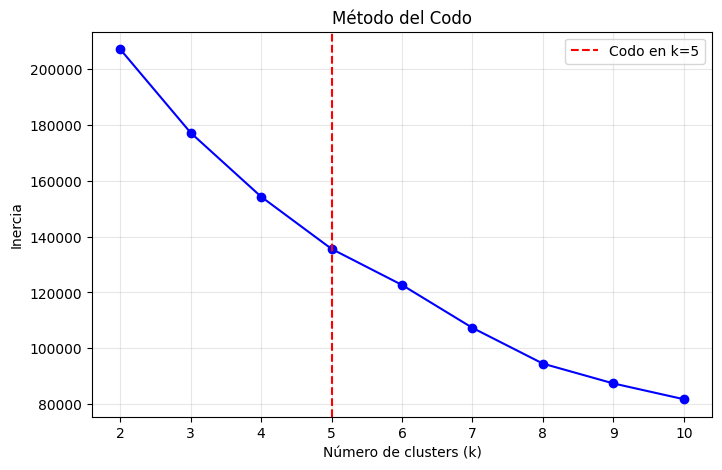

Número óptimo de clusters según el codo: 5


In [27]:
inertias = []
K_range = range(2, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(df_scaled)
    inertias.append(km.inertia_)

kn = KneeLocator(list(K_range), inertias, curve='convex', direction='decreasing')

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, 'bo-')
plt.axvline(x=kn.knee, color='r', linestyle='--', label=f'Codo en k={kn.knee}')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Número óptimo de clusters según el codo: {kn.knee}")

In [28]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df_cluster['kmeans_cluster'] = kmeans.fit_predict(df_scaled)

print("Distribución de clusters K-Means:")
print(df_cluster['kmeans_cluster'].value_counts().sort_index())

Distribución de clusters K-Means:
kmeans_cluster
0     690
1    9169
2    9638
3     279
4     105
Name: count, dtype: int64


In [29]:
from sklearn.cluster import AgglomerativeClustering

hierarchical = AgglomerativeClustering(n_clusters=5, linkage='ward')
df_cluster['hier_cluster'] = hierarchical.fit_predict(df_scaled)

print("Distribución de clusters Jerárquico:")
print(df_cluster['hier_cluster'].value_counts().sort_index())

Distribución de clusters Jerárquico:
hier_cluster
0    9208
1     347
2    1854
3    8356
4     116
Name: count, dtype: int64


In [30]:
sil_kmeans = silhouette_score(df_scaled, df_cluster['kmeans_cluster'])
sil_hier = silhouette_score(df_scaled, df_cluster['hier_cluster'])

print(f"Silueta K-Means:    {sil_kmeans:.4f}")
print(f"Silueta Jerárquico: {sil_hier:.4f}")
print(f"\nMejor algoritmo: {'K-Means' if sil_kmeans > sil_hier else 'Jerárquico'}")

Silueta K-Means:    0.3778
Silueta Jerárquico: 0.3490

Mejor algoritmo: K-Means


In [31]:
cluster_summary = df_cluster.drop(columns=['hier_cluster']).groupby('kmeans_cluster').agg(['mean', 'median', 'count']).round(2)
cluster_summary.columns = ['_'.join(col) for col in cluster_summary.columns]
cluster_summary.T

kmeans_cluster,0,1,2,3,4
budget_mean,1.166048e+08,15768.38,11030976.28,265037.19,1636466.67
budget_median,1.100000e+08,0.00,0.00,0.00,0.00
budget_count,6.900000e+02,9169.00,9638.00,279.00,105.00
revenue_mean,4.693797e+08,21729.28,25668891.14,2546578.20,2814140.30
revenue_median,3.705555e+08,0.00,0.00,0.00,0.00
revenue_count,6.900000e+02,9169.00,9638.00,279.00,105.00
runtime_mean,1.212700e+02,26.20,99.66,85.27,56.15
runtime_median,1.190000e+02,9.00,99.00,90.00,70.00
runtime_count,6.900000e+02,9169.00,9638.00,279.00,105.00
popularity_mean,2.018000e+02,0.90,36.98,47.45,44.97


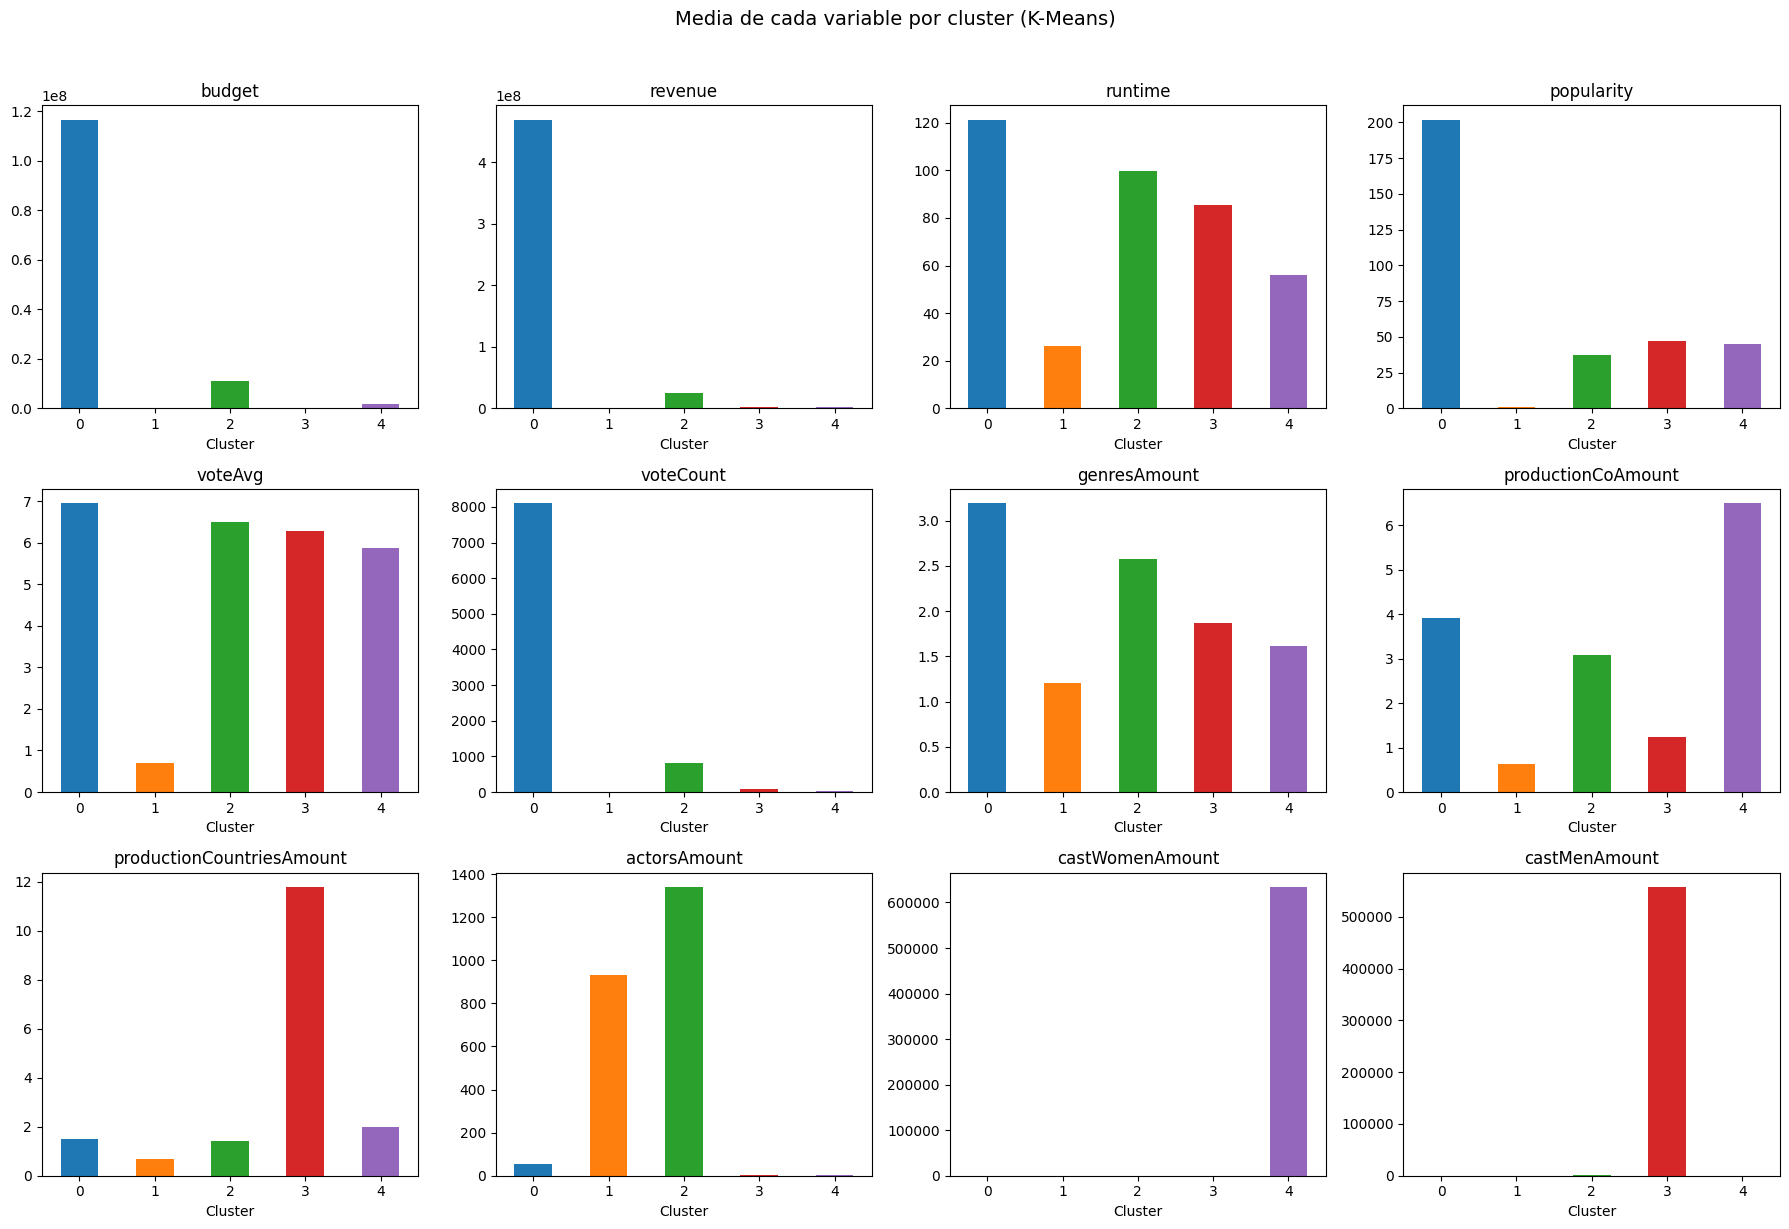

In [32]:
cluster_means = df_cluster.drop(columns=['hier_cluster']).groupby('kmeans_cluster').mean()

fig, axes = plt.subplots(3, 4, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(numeric_vars[:12]):
    cluster_means[col].plot(kind='bar', ax=axes[i], color=['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd'])
    axes[i].set_title(col)
    axes[i].set_xlabel('Cluster')
    axes[i].tick_params(axis='x', rotation=0)

plt.suptitle('Media de cada variable por cluster (K-Means)', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

In [33]:
print("castWomenAmount - valores extremos:")
print(df_cluster['castWomenAmount'].describe())
print(f"\nValores > 1000: {(df_cluster['castWomenAmount'] > 1000).sum()}")

print("\ncastMenAmount - valores extremos:")
print(df_cluster['castMenAmount'].describe())
print(f"\nValores > 1000: {(df_cluster['castMenAmount'] > 1000).sum()}")

castWomenAmount - valores extremos:
count     19881.000000
mean       3510.315276
std       47726.821258
min           0.000000
25%           0.000000
50%           2.000000
75%           6.000000
max      922162.000000
Name: castWomenAmount, dtype: float64

Valores > 1000: 125

castMenAmount - valores extremos:
count     19881.000000
mean       8158.163422
std       70974.415894
min           0.000000
25%           0.000000
50%           3.000000
75%          11.000000
max      922017.000000
Name: castMenAmount, dtype: float64

Valores > 1000: 359


In [34]:
numeric_vars = ['budget', 'revenue', 'runtime', 'popularity', 'voteAvg', 
                'voteCount', 'genresAmount', 'productionCoAmount', 
                'productionCountriesAmount', 'actorsAmount', 'releaseYear']

df_cluster = df_cluster[numeric_vars].copy()

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_cluster), columns=df_cluster.columns)

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df_cluster['kmeans_cluster'] = kmeans.fit_predict(df_scaled)

hierarchical = AgglomerativeClustering(n_clusters=5, linkage='ward')
df_cluster['hier_cluster'] = hierarchical.fit_predict(df_scaled)

sil_kmeans = silhouette_score(df_scaled, df_cluster['kmeans_cluster'])
sil_hier = silhouette_score(df_scaled, df_cluster['hier_cluster'])

print(f"Silueta K-Means:    {sil_kmeans:.4f}")
print(f"Silueta Jerárquico: {sil_hier:.4f}")
print(f"\nDistribución K-Means:")
print(df_cluster['kmeans_cluster'].value_counts().sort_index())
print(f"\nDistribución Jerárquico:")
print(df_cluster['hier_cluster'].value_counts().sort_index())

Silueta K-Means:    0.3711
Silueta Jerárquico: 0.3467

Distribución K-Means:
kmeans_cluster
0    9926
1     720
2    9195
3      32
4       8
Name: count, dtype: int64

Distribución Jerárquico:
hier_cluster
0    1709
1    8361
2    9769
3      35
4       7
Name: count, dtype: int64


In [35]:
cluster_means = df_cluster.drop(columns=['hier_cluster']).groupby('kmeans_cluster').mean().round(2)
print(cluster_means.to_string())

                      budget       revenue  runtime  popularity  voteAvg  voteCount  genresAmount  productionCoAmount  productionCountriesAmount  actorsAmount  releaseYear
kmeans_cluster                                                                                                                                                             
0               1.047629e+07  2.429118e+07    99.08       37.20     6.49     770.73          2.55                3.07                       1.72         80.38      2009.72
1               1.141667e+08  4.560095e+08   120.88      124.83     6.94    8006.28          3.17                3.93                       1.48         56.00      2009.13
2               9.960070e+03  2.280930e+03    26.20        1.15     0.72       0.62          1.20                0.64                       0.68         49.81      2025.11
3               1.406251e+06  5.570708e+06    55.88       26.60     6.17       5.25          2.66                0.69                       

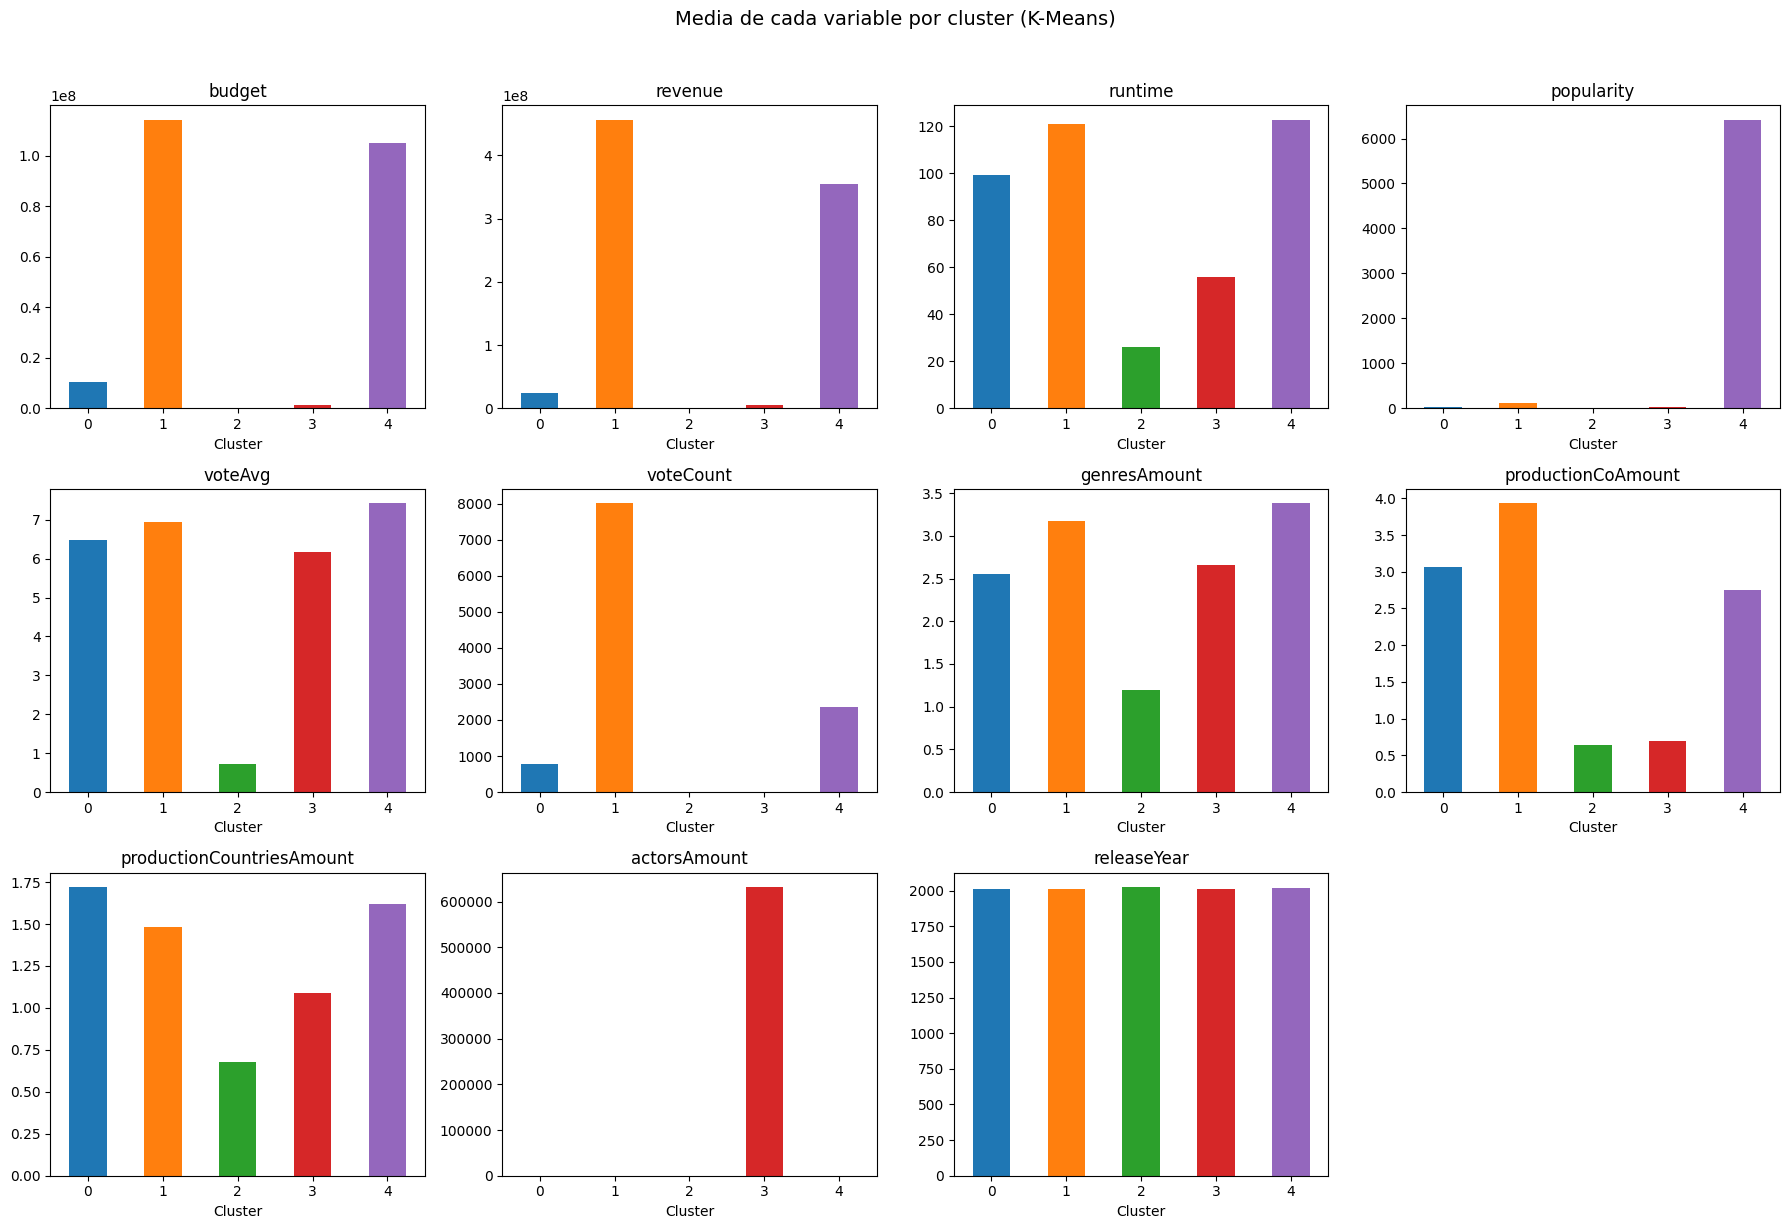

In [36]:
fig, axes = plt.subplots(3, 4, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(numeric_vars):
    cluster_means[col].plot(kind='bar', ax=axes[i], color=['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd'])
    axes[i].set_title(col)
    axes[i].set_xlabel('Cluster')
    axes[i].tick_params(axis='x', rotation=0)

axes[11].axis('off')
plt.suptitle('Media de cada variable por cluster (K-Means)', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

In [37]:
print(df_cluster['actorsAmount'].describe())
print(f"\nValores > 500: {(df_cluster['actorsAmount'] > 500).sum()}")

count     19881.000000
mean       1082.158242
std       26404.144588
min           0.000000
25%           3.000000
50%           9.000000
75%          21.000000
max      919590.000000
Name: actorsAmount, dtype: float64

Valores > 500: 37


In [38]:
numeric_vars = ['budget', 'revenue', 'runtime', 'popularity', 'voteAvg', 
                'voteCount', 'genresAmount', 'productionCoAmount', 
                'productionCountriesAmount', 'releaseYear']

df_cluster = df_cluster[numeric_vars].copy()

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_cluster), columns=df_cluster.columns)

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df_cluster['kmeans_cluster'] = kmeans.fit_predict(df_scaled)

hierarchical = AgglomerativeClustering(n_clusters=5, linkage='ward')
df_cluster['hier_cluster'] = hierarchical.fit_predict(df_scaled)

sil_kmeans = silhouette_score(df_scaled, df_cluster['kmeans_cluster'])
sil_hier = silhouette_score(df_scaled, df_cluster['hier_cluster'])

print(f"Silueta K-Means:    {sil_kmeans:.4f}")
print(f"Silueta Jerárquico: {sil_hier:.4f}")
print(f"\nDistribución K-Means:")
print(df_cluster['kmeans_cluster'].value_counts().sort_index())

cluster_means = df_cluster.drop(columns=['hier_cluster']).groupby('kmeans_cluster').mean().round(2)
print(f"\n{cluster_means.to_string()}")

Silueta K-Means:    0.3367
Silueta Jerárquico: 0.3629

Distribución K-Means:
kmeans_cluster
0    7351
1    8512
2    3518
3     492
4       8
Name: count, dtype: int64

                      budget       revenue  runtime  popularity  voteAvg  voteCount  genresAmount  productionCoAmount  productionCountriesAmount  releaseYear
kmeans_cluster                                                                                                                                               
0               2.643955e+06  4.833415e+06    88.45       35.91     6.43     308.87          2.32                2.48                       1.73      2016.64
1               1.061064e+04  2.234424e+04    25.27        0.59     0.24       0.16          1.17                0.61                       0.66      2025.18
2               2.891270e+07  7.455610e+07   110.14       36.33     6.67    1860.84          2.89                3.96                       1.52      1997.89
3               1.322832e+08  5.520962e+0

In [39]:
cluster_means_hier = df_cluster.drop(columns=['kmeans_cluster']).groupby('hier_cluster').mean().round(2)
print("Distribución Jerárquico:")
print(df_cluster['hier_cluster'].value_counts().sort_index())
print(f"\n{cluster_means_hier.to_string()}")

Distribución Jerárquico:
hier_cluster
0    10386
1     8368
2      945
3        7
4      175
Name: count, dtype: int64

                   budget       revenue  runtime  popularity  voteAvg  voteCount  genresAmount  productionCoAmount  productionCountriesAmount  releaseYear
hier_cluster                                                                                                                                              
0              9815628.51  2.061392e+07    91.22       33.26     6.59     614.96          2.45                2.86                       1.36      2010.89
1                10079.20  1.926340e+03    28.41        0.29     0.01       0.02          1.21                0.66                       0.69      2025.25
2             89256679.12  3.755591e+08   118.96      125.76     7.01    7423.46          2.96                3.91                       1.54      2008.03
3             92857142.86  3.836708e+08   119.14     6786.68     7.50    2334.71          3.29           

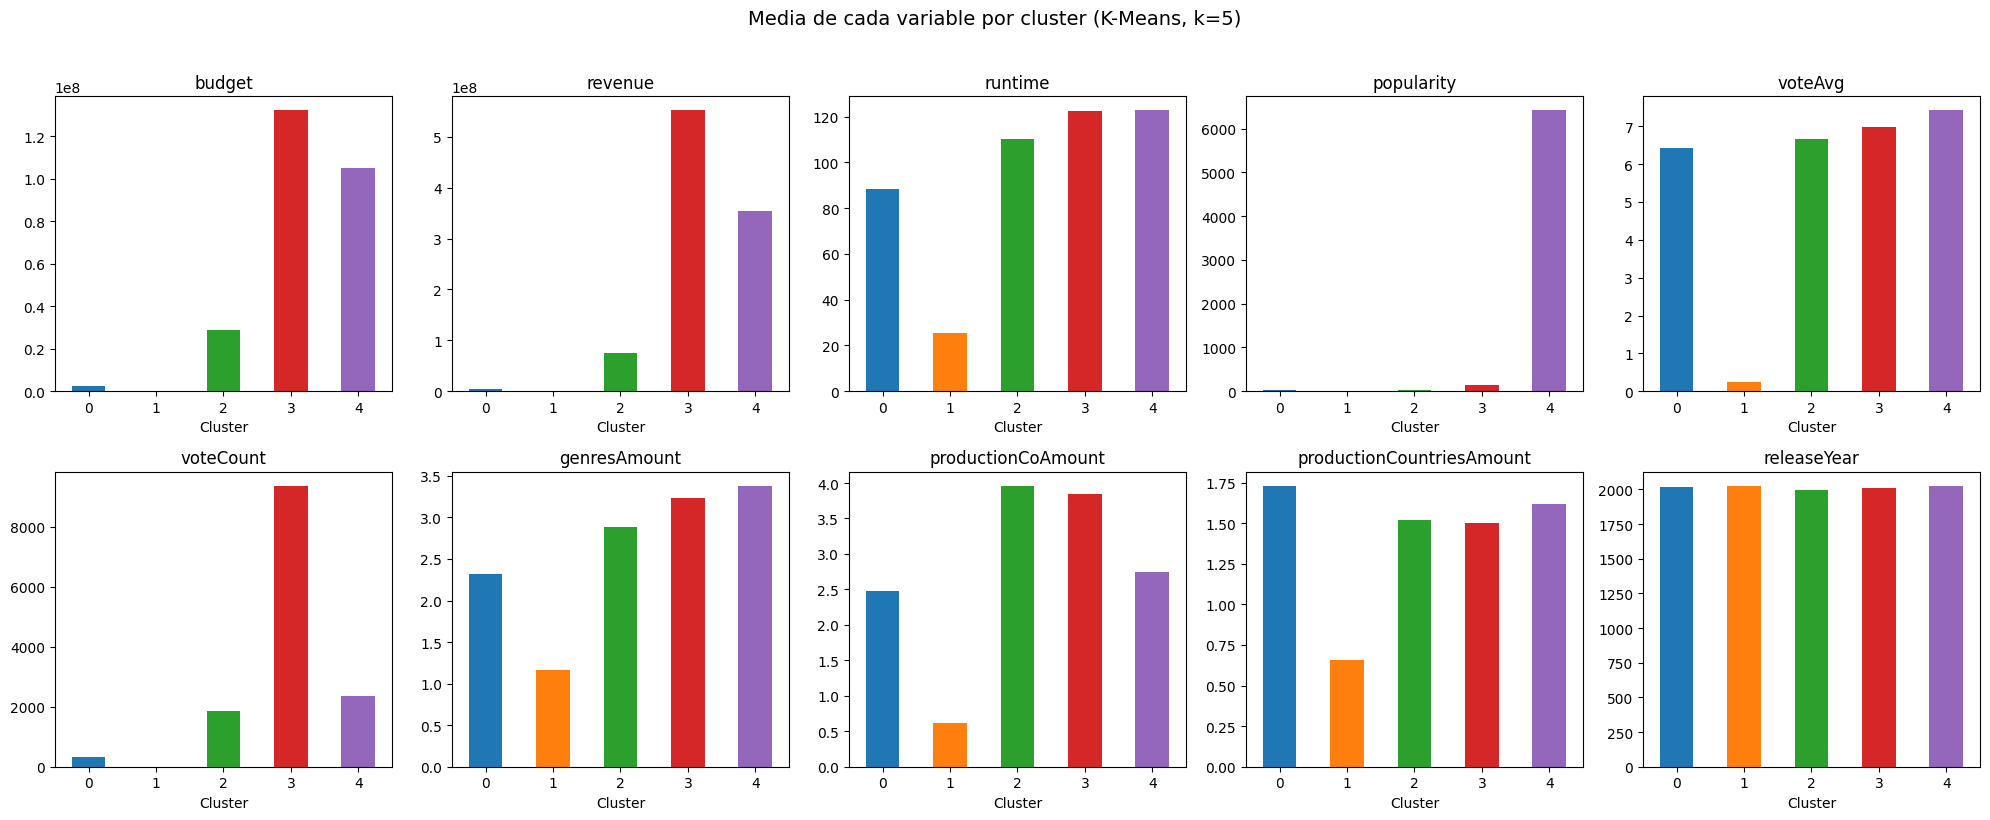

In [40]:
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for i, col in enumerate(numeric_vars):
    cluster_means[col].plot(kind='bar', ax=axes[i], color=['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd'])
    axes[i].set_title(col)
    axes[i].set_xlabel('Cluster')
    axes[i].tick_params(axis='x', rotation=0)

plt.suptitle('Media de cada variable por cluster (K-Means, k=5)', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

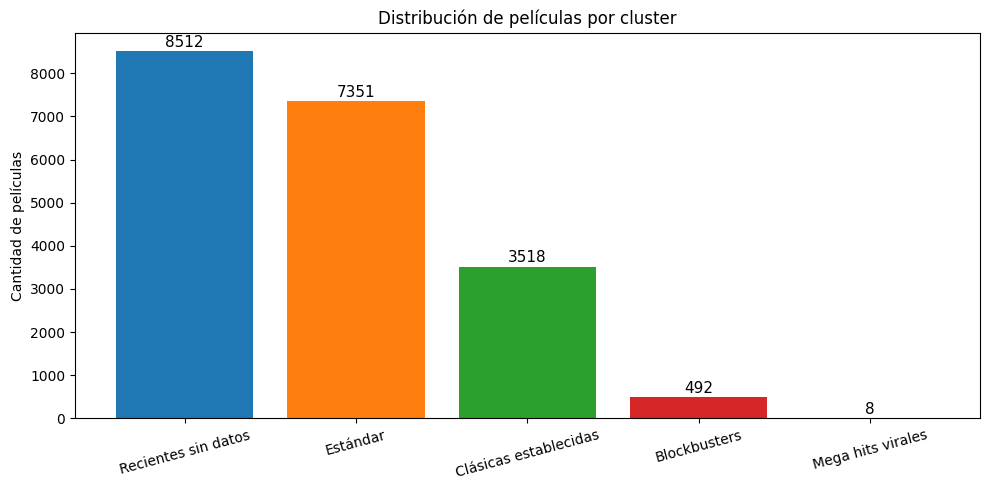

In [41]:
cluster_names = {
    0: 'Estándar',
    1: 'Recientes sin datos',
    2: 'Clásicas establecidas',
    3: 'Blockbusters',
    4: 'Mega hits virales'
}

df_cluster['cluster_name'] = df_cluster['kmeans_cluster'].map(cluster_names)

colors = ['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd']
counts = df_cluster['cluster_name'].value_counts()

plt.figure(figsize=(10, 5))
bars = plt.bar(counts.index, counts.values, color=colors)
for bar, val in zip(bars, counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100, str(val), ha='center', fontsize=11)
plt.title('Distribución de películas por cluster')
plt.ylabel('Cantidad de películas')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

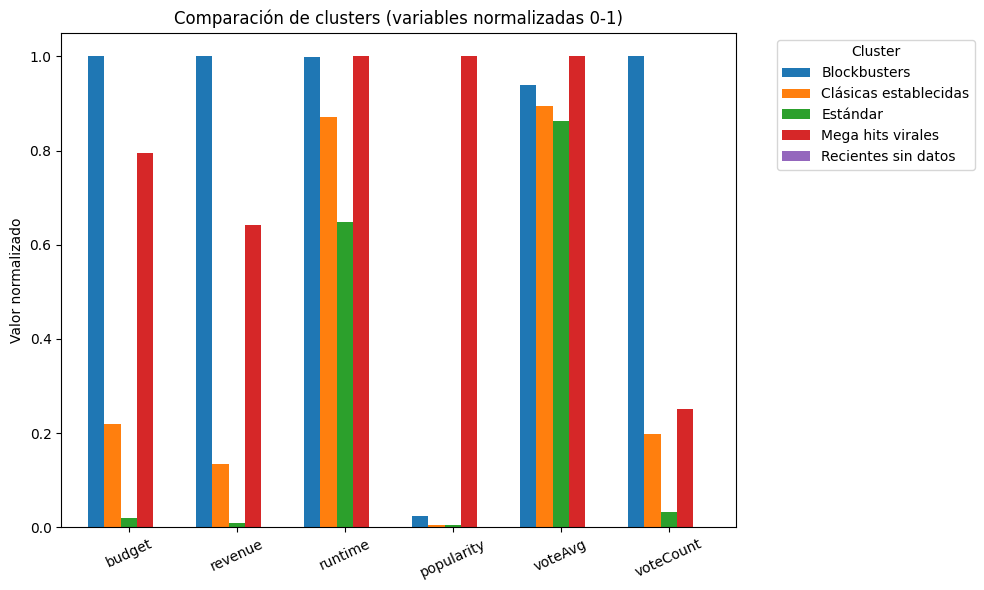

In [42]:
from sklearn.preprocessing import MinMaxScaler

radar_vars = ['budget', 'revenue', 'runtime', 'popularity', 'voteAvg', 'voteCount']
cluster_means_radar = df_cluster.groupby('cluster_name')[radar_vars].mean()

scaler_radar = MinMaxScaler()
radar_scaled = pd.DataFrame(scaler_radar.fit_transform(cluster_means_radar), 
                            columns=radar_vars, index=cluster_means_radar.index)

fig, ax = plt.subplots(figsize=(10, 6))
radar_scaled.T.plot(kind='bar', ax=ax, color=colors, width=0.75)
ax.set_title('Comparación de clusters (variables normalizadas 0-1)')
ax.set_ylabel('Valor normalizado')
ax.legend(title='Cluster', bbox_to_anchor=(1.05, 1))
ax.tick_params(axis='x', rotation=25)
plt.tight_layout()
plt.show()

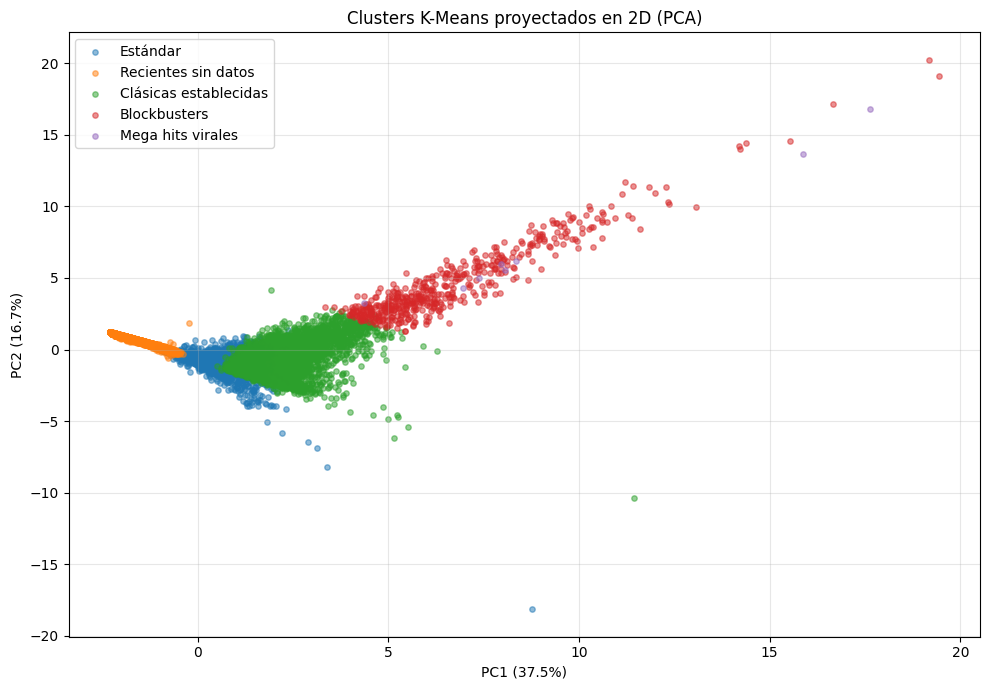

In [43]:
pca_2d = PCA(n_components=2)
df_pca_2d = pca_2d.fit_transform(df_scaled)

cluster_names = {
    0: 'Estándar',
    1: 'Recientes sin datos',
    2: 'Clásicas establecidas',
    3: 'Blockbusters',
    4: 'Mega hits virales'
}
df_cluster['cluster_name'] = df_cluster['kmeans_cluster'].map(cluster_names)

colors = ['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd']

plt.figure(figsize=(10, 7))
for i, name in enumerate(cluster_names.values()):
    mask = df_cluster['cluster_name'] == name
    plt.scatter(df_pca_2d[mask, 0], df_pca_2d[mask, 1], 
                c=colors[i], label=name, alpha=0.5, s=15)

plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}%)')
plt.title('Clusters K-Means proyectados en 2D (PCA)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

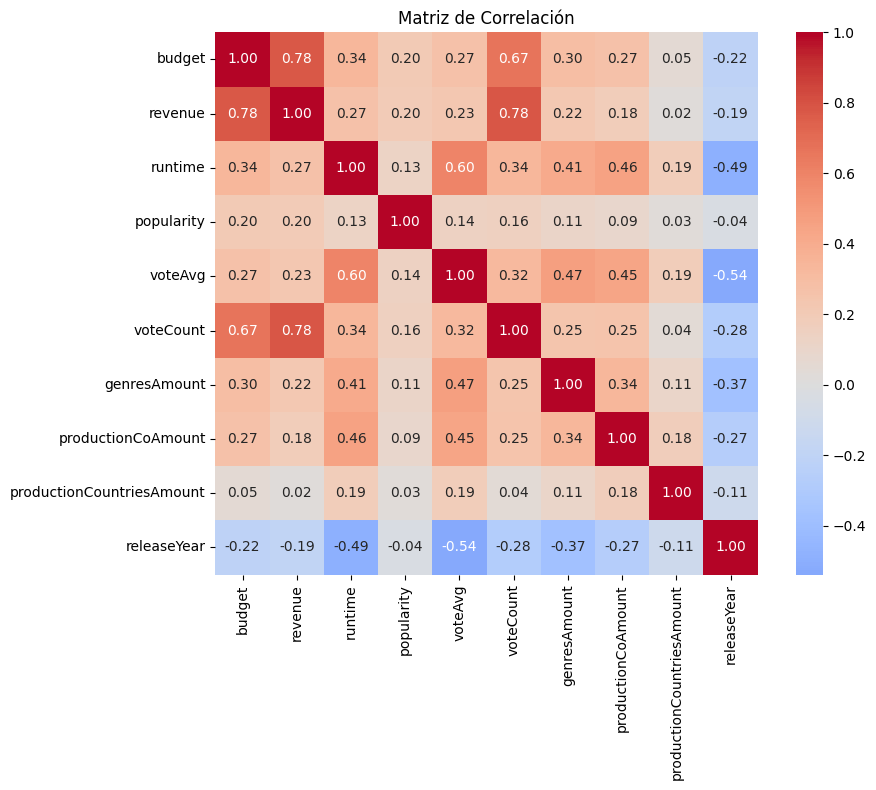

In [64]:
corr_matrix = df_cluster[numeric_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True)
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

In [65]:
from factor_analyzer import calculate_kmo, calculate_bartlett_sphericity

chi_square, p_value = calculate_bartlett_sphericity(df_cluster[numeric_vars])
print(f"Test de Bartlett:")
print(f"  Chi-cuadrado: {chi_square:.2f}")
print(f"  p-value: {p_value:.6f}")
print(f"  {'Se rechaza H0: las variables están correlacionadas' if p_value < 0.05 else 'No se rechaza H0'}")

kmo_all, kmo_model = calculate_kmo(df_cluster[numeric_vars])
print(f"\nKMO: {kmo_model:.4f}")
print(f"  {'Adecuado para PCA' if kmo_model > 0.5 else 'No adecuado para PCA'}")

Test de Bartlett:
  Chi-cuadrado: 73506.74
  p-value: 0.000000
  Se rechaza H0: las variables están correlacionadas

KMO: 0.8156
  Adecuado para PCA


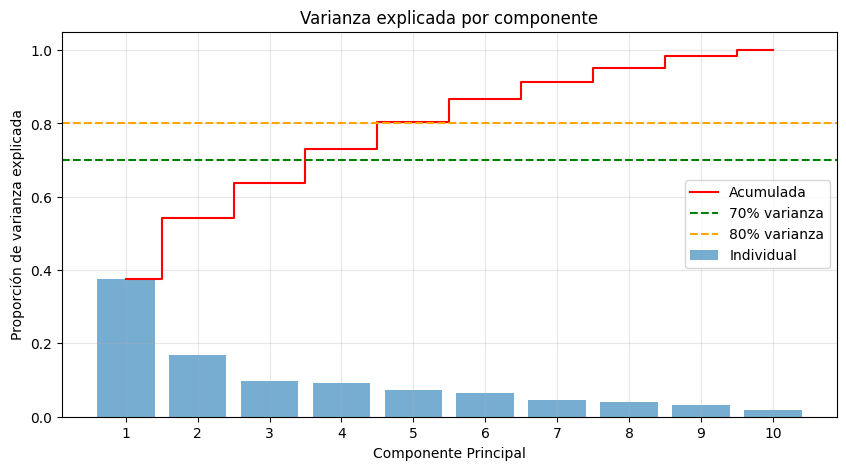

PC1: 0.3750 (0.3750 acumulada)
PC2: 0.1672 (0.5422 acumulada)
PC3: 0.0964 (0.6386 acumulada)
PC4: 0.0924 (0.7310 acumulada)
PC5: 0.0723 (0.8033 acumulada)
PC6: 0.0642 (0.8675 acumulada)
PC7: 0.0444 (0.9120 acumulada)
PC8: 0.0394 (0.9514 acumulada)
PC9: 0.0311 (0.9825 acumulada)
PC10: 0.0175 (1.0000 acumulada)


In [47]:
pca = PCA()
pca.fit(df_scaled)

var_exp = pca.explained_variance_ratio_
var_cum = np.cumsum(var_exp)

plt.figure(figsize=(10, 5))
plt.bar(range(1, len(var_exp)+1), var_exp, alpha=0.6, label='Individual')
plt.step(range(1, len(var_exp)+1), var_cum, where='mid', color='red', label='Acumulada')
plt.axhline(y=0.7, color='green', linestyle='--', label='70% varianza')
plt.axhline(y=0.8, color='orange', linestyle='--', label='80% varianza')
plt.xlabel('Componente Principal')
plt.ylabel('Proporción de varianza explicada')
plt.title('Varianza explicada por componente')
plt.legend()
plt.xticks(range(1, len(var_exp)+1))
plt.grid(True, alpha=0.3)
plt.show()

for i, (ve, vc) in enumerate(zip(var_exp, var_cum)):
    print(f"PC{i+1}: {ve:.4f} ({vc:.4f} acumulada)")

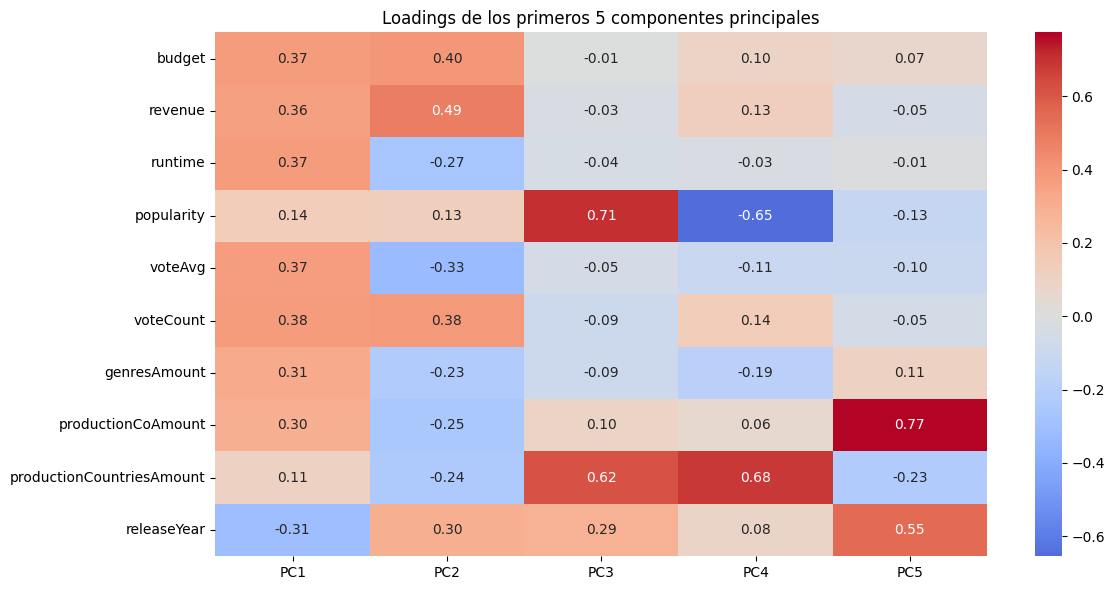

                             PC1    PC2    PC3    PC4    PC5
budget                     0.375  0.399 -0.006  0.095  0.068
revenue                    0.357  0.486 -0.028  0.129 -0.051
runtime                    0.374 -0.269 -0.037 -0.029 -0.010
popularity                 0.140  0.132  0.706 -0.655 -0.128
voteAvg                    0.370 -0.330 -0.048 -0.111 -0.104
voteCount                  0.378  0.382 -0.091  0.140 -0.052
genresAmount               0.311 -0.229 -0.092 -0.185  0.114
productionCoAmount         0.298 -0.249  0.097  0.056  0.774
productionCountriesAmount  0.110 -0.241  0.622  0.685 -0.229
releaseYear               -0.309  0.296  0.288  0.084  0.546


In [49]:
n_components = 5
loadings = pd.DataFrame(
    pca.components_[:n_components].T,
    columns=[f'PC{i+1}' for i in range(n_components)],
    index=numeric_vars
)

plt.figure(figsize=(12, 6))
sns.heatmap(loadings, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title(f'Loadings de los primeros {n_components} componentes principales')
plt.tight_layout()
plt.show()

print(loadings.round(3).to_string())

In [50]:
df_rules = pd.DataFrame()

df_rules['budget'] = pd.cut(df['budget'], bins=[-1, 0, 1e6, 5e7, float('inf')], 
                            labels=['Sin_budget', 'Budget_bajo', 'Budget_medio', 'Budget_alto'])

df_rules['revenue'] = pd.cut(df['revenue'], bins=[-1, 0, 1e6, 5e7, float('inf')],
                             labels=['Sin_revenue', 'Revenue_bajo', 'Revenue_medio', 'Revenue_alto'])

df_rules['runtime'] = pd.cut(df['runtime'], bins=[0, 40, 90, 120, float('inf')],
                             labels=['Corta', 'Media', 'Larga', 'Muy_larga'])

df_rules['popularity'] = pd.cut(df['popularity'], bins=[-1, 1, 20, 100, float('inf')],
                                labels=['Pop_baja', 'Pop_media', 'Pop_alta', 'Pop_muy_alta'])

df_rules['voteAvg'] = pd.cut(df['voteAvg'], bins=[-1, 0, 5, 7, float('inf')],
                             labels=['Sin_votos', 'Mal_calificada', 'Bien_calificada', 'Excelente'])

df_rules['voteCount'] = pd.cut(df['voteCount'], bins=[-1, 0, 100, 1000, float('inf')],
                               labels=['Sin_voteCount', 'Pocos_votos', 'Votos_medios', 'Muchos_votos'])

genres_split = df['genres'].dropna().str.split('|')
top_genres = genres_split.explode().value_counts().head(8).index.tolist()
for genre in top_genres:
    df_rules[f'genre_{genre}'] = df['genres'].fillna('').str.contains(genre).astype(int)

df_rules['language'] = df['originalLanguage'].apply(lambda x: x if x == 'en' else 'other_lang')

df_rules = df_rules.dropna()
print(f"Shape: {df_rules.shape}")
print(f"\nColumnas: {list(df_rules.columns)}")
print(f"\nTop géneros incluidos: {top_genres}")

Shape: (16932, 15)

Columnas: ['budget', 'revenue', 'runtime', 'popularity', 'voteAvg', 'voteCount', 'genre_Drama', 'genre_Comedy', 'genre_Thriller', 'genre_Action', 'genre_Documentary', 'genre_Horror', 'genre_Adventure', 'genre_Romance', 'language']

Top géneros incluidos: ['Drama', 'Comedy', 'Thriller', 'Action', 'Documentary', 'Horror', 'Adventure', 'Romance']


In [51]:
df_onehot = pd.get_dummies(df_rules[['budget', 'revenue', 'runtime', 'popularity', 'voteAvg', 'voteCount', 'language']])

genre_cols = [col for col in df_rules.columns if col.startswith('genre_')]
df_onehot = pd.concat([df_onehot, df_rules[genre_cols]], axis=1)

df_onehot = df_onehot.astype(bool)

print(f"Shape one-hot: {df_onehot.shape}")
print(f"Columnas: {list(df_onehot.columns)}")

Shape one-hot: (16932, 34)
Columnas: ['budget_Sin_budget', 'budget_Budget_bajo', 'budget_Budget_medio', 'budget_Budget_alto', 'revenue_Sin_revenue', 'revenue_Revenue_bajo', 'revenue_Revenue_medio', 'revenue_Revenue_alto', 'runtime_Corta', 'runtime_Media', 'runtime_Larga', 'runtime_Muy_larga', 'popularity_Pop_baja', 'popularity_Pop_media', 'popularity_Pop_alta', 'popularity_Pop_muy_alta', 'voteAvg_Sin_votos', 'voteAvg_Mal_calificada', 'voteAvg_Bien_calificada', 'voteAvg_Excelente', 'voteCount_Sin_voteCount', 'voteCount_Pocos_votos', 'voteCount_Votos_medios', 'voteCount_Muchos_votos', 'language_en', 'language_other_lang', 'genre_Drama', 'genre_Comedy', 'genre_Thriller', 'genre_Action', 'genre_Documentary', 'genre_Horror', 'genre_Adventure', 'genre_Romance']


In [52]:
frequent_items = apriori(df_onehot, min_support=0.1, use_colnames=True)
print(f"Itemsets frecuentes: {len(frequent_items)}")

rules = association_rules(frequent_items, metric="confidence", min_threshold=0.5, num_itemsets=len(frequent_items))
rules = rules.sort_values('lift', ascending=False)
print(f"Reglas generadas: {len(rules)}")
print(f"\nTop 10 reglas por lift:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10).to_string())

Itemsets frecuentes: 302
Reglas generadas: 1623

Top 10 reglas por lift:
                                                      antecedents                                                  consequents   support  confidence      lift
271                         (voteCount_Muchos_votos, language_en)                                       (revenue_Revenue_alto)  0.113159    0.662746  4.740863
274                                        (revenue_Revenue_alto)                        (voteCount_Muchos_votos, language_en)  0.113159    0.809463  4.740863
273                                      (voteCount_Muchos_votos)                          (revenue_Revenue_alto, language_en)  0.113159    0.619063  4.671112
272                           (revenue_Revenue_alto, language_en)                                     (voteCount_Muchos_votos)  0.113159    0.853832  4.671112
42                                         (revenue_Revenue_alto)                                     (voteCount_Muchos_votos)  0.11

In [53]:
trivial_terms = ['Sin_budget', 'Sin_revenue', 'Sin_votos', 'Sin_voteCount', 'Pop_baja']

def filter_trivial(rules_df):
    mask = rules_df.apply(lambda row: not any(
        term in str(row['antecedents']) and term in str(row['consequents']) 
        for term in trivial_terms
    ), axis=1)
    
    mask2 = rules_df.apply(lambda row: not all(
        any(t in str(item) for t in trivial_terms) 
        for item in list(row['antecedents']) + list(row['consequents'])
    ), axis=1)
    return rules_df[mask & mask2]

configs = [
    {'support': 0.10, 'confidence': 0.5},
    {'support': 0.05, 'confidence': 0.6},
    {'support': 0.05, 'confidence': 0.7},
]

for cfg in configs:
    fi = apriori(df_onehot, min_support=cfg['support'], use_colnames=True)
    r = association_rules(fi, metric="confidence", min_threshold=cfg['confidence'], num_itemsets=len(fi))
    r_filtered = filter_trivial(r)
    r_filtered = r_filtered.sort_values('lift', ascending=False)
    print(f"\n=== Soporte={cfg['support']}, Confianza={cfg['confidence']} ===")
    print(f"Reglas totales: {len(r)} | Reglas filtradas: {len(r_filtered)}")
    if len(r_filtered) > 0:
        print(r_filtered[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(5).to_string())


=== Soporte=0.1, Confianza=0.5 ===
Reglas totales: 1623 | Reglas filtradas: 1468
                               antecedents                            consequents   support  confidence      lift
274                 (revenue_Revenue_alto)  (voteCount_Muchos_votos, language_en)  0.113159    0.809463  4.740863
271  (voteCount_Muchos_votos, language_en)                 (revenue_Revenue_alto)  0.113159    0.662746  4.740863
273               (voteCount_Muchos_votos)    (revenue_Revenue_alto, language_en)  0.113159    0.619063  4.671112
272    (revenue_Revenue_alto, language_en)               (voteCount_Muchos_votos)  0.113159    0.853832  4.671112
42                  (revenue_Revenue_alto)               (voteCount_Muchos_votos)  0.115993    0.829742  4.539320

=== Soporte=0.05, Confianza=0.6 ===
Reglas totales: 2651 | Reglas filtradas: 2506
                                                    antecedents                                                  consequents   support  confidence     

In [54]:
fi = apriori(df_onehot, min_support=0.05, use_colnames=True)
r = association_rules(fi, metric="confidence", min_threshold=0.5, num_itemsets=len(fi))

genre_rules = r[r.apply(lambda row: any('genre_' in str(item) for item in 
              list(row['antecedents']) + list(row['consequents'])), axis=1)]
genre_rules = filter_trivial(genre_rules).sort_values('lift', ascending=False)

print(f"Reglas con géneros: {len(genre_rules)}")
print(genre_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(15).to_string())

Reglas con géneros: 805
                                                                           antecedents                                                                             consequents   support  confidence      lift
1889                                                  (voteAvg_Sin_votos, genre_Drama)                                          (voteCount_Sin_voteCount, language_other_lang)  0.052327    0.527067  3.251112
1890                                            (genre_Drama, voteCount_Sin_voteCount)                                                (voteAvg_Sin_votos, language_other_lang)  0.052327    0.528324  3.250577
2741                             (voteAvg_Sin_votos, genre_Drama, revenue_Sin_revenue)                                          (voteCount_Sin_voteCount, language_other_lang)  0.051441    0.526602  3.248243
2740                       (genre_Drama, revenue_Sin_revenue, voteCount_Sin_voteCount)                                                (voteAvg_Sin_v

In [55]:
empty_terms = ['Sin_budget', 'Sin_revenue', 'Sin_votos', 'Sin_voteCount', 'Pop_baja']

def is_interesting(row):
    all_items = [str(item) for item in list(row['antecedents']) + list(row['consequents'])]
    has_empty = any(term in item for item in all_items for term in empty_terms)
    return not has_empty

fi = apriori(df_onehot, min_support=0.03, use_colnames=True)
r = association_rules(fi, metric="confidence", min_threshold=0.5, num_itemsets=len(fi))
interesting = r[r.apply(is_interesting, axis=1)].sort_values('lift', ascending=False)

print(f"Reglas interesantes: {len(interesting)}")
print(interesting[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(15).to_string())

Reglas interesantes: 1829
                                                                               antecedents                                                                           consequents   support  confidence      lift
517                                                   (genre_Action, revenue_Revenue_alto)                                                                  (budget_Budget_alto)  0.030180    0.602594  9.077515
5016                                             (popularity_Pop_alta, budget_Budget_alto)                           (voteCount_Muchos_votos, revenue_Revenue_alto, language_en)  0.034668    0.878743  7.765589
5012                                (popularity_Pop_alta, budget_Budget_alto, language_en)                                        (voteCount_Muchos_votos, revenue_Revenue_alto)  0.034668    0.896183  7.726158
5035                                                     (budget_Budget_alto, language_en)               (voteCount_Muchos_votos, revenue_

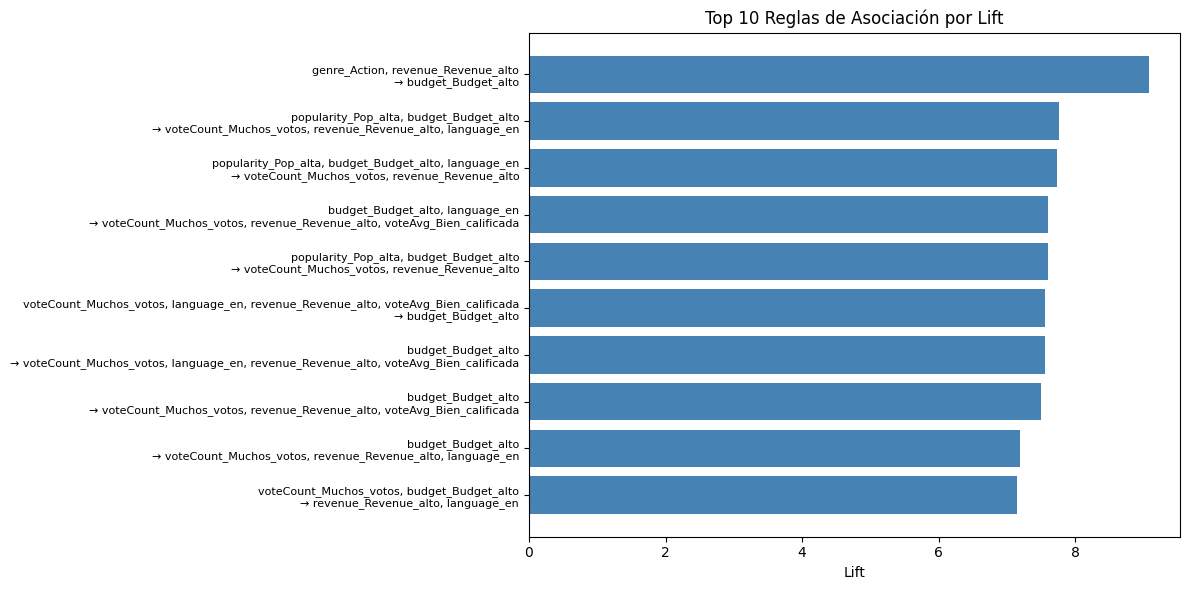

In [56]:
top_rules = interesting.head(10).copy()
top_rules['rule'] = top_rules.apply(lambda r: 
    ', '.join([str(x) for x in r['antecedents']]) + '\n→ ' + 
    ', '.join([str(x) for x in r['consequents']]), axis=1)

fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(range(len(top_rules)), top_rules['lift'], color='steelblue')
ax.set_yticks(range(len(top_rules)))
ax.set_yticklabels(top_rules['rule'], fontsize=8)
ax.set_xlabel('Lift')
ax.set_title('Top 10 Reglas de Asociación por Lift')
ax.invert_yaxis()
plt.tight_layout()
plt.show()

## 4. Otros Algoritmos de Aprendizaje No Supervisado

### 4.1 Seleccion del algoritmo: t-SNE

t-SNE fue seleccionado porque:
- **Visualizacion de alta dimension**: el dataset tiene 10 variables numericas y t-SNE permite proyectarlas a 2D preservando relaciones de vecindad local.
- **Validacion de clusters**: permite verificar visualmente si los clusters de K-Means tienen sentido en el espacio original de los datos.
- **Deteccion de subgrupos ocultos**: revela estructuras no lineales que PCA no captura.

In [67]:
from sklearn.manifold import TSNE
import numpy as np

# Usar muestra para eficiencia computacional
np.random.seed(42)
sample_size = min(3000, len(df_scaled))
sample_idx = np.random.choice(len(df_scaled), sample_size, replace=False)
df_scaled_sample = df_scaled.iloc[sample_idx].reset_index(drop=True)
cluster_sample = df_cluster["kmeans_cluster"].iloc[sample_idx].reset_index(drop=True)

print("Aplicando t-SNE con perplexity=30, max_iter=1000...")
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, max_iter=1000, random_state=42)
tsne_result = tsne.fit_transform(df_scaled_sample)
print(f"t-SNE completado. Forma del resultado: {tsne_result.shape}")

Aplicando t-SNE con perplexity=30, max_iter=1000...
t-SNE completado. Forma del resultado: (3000, 2)


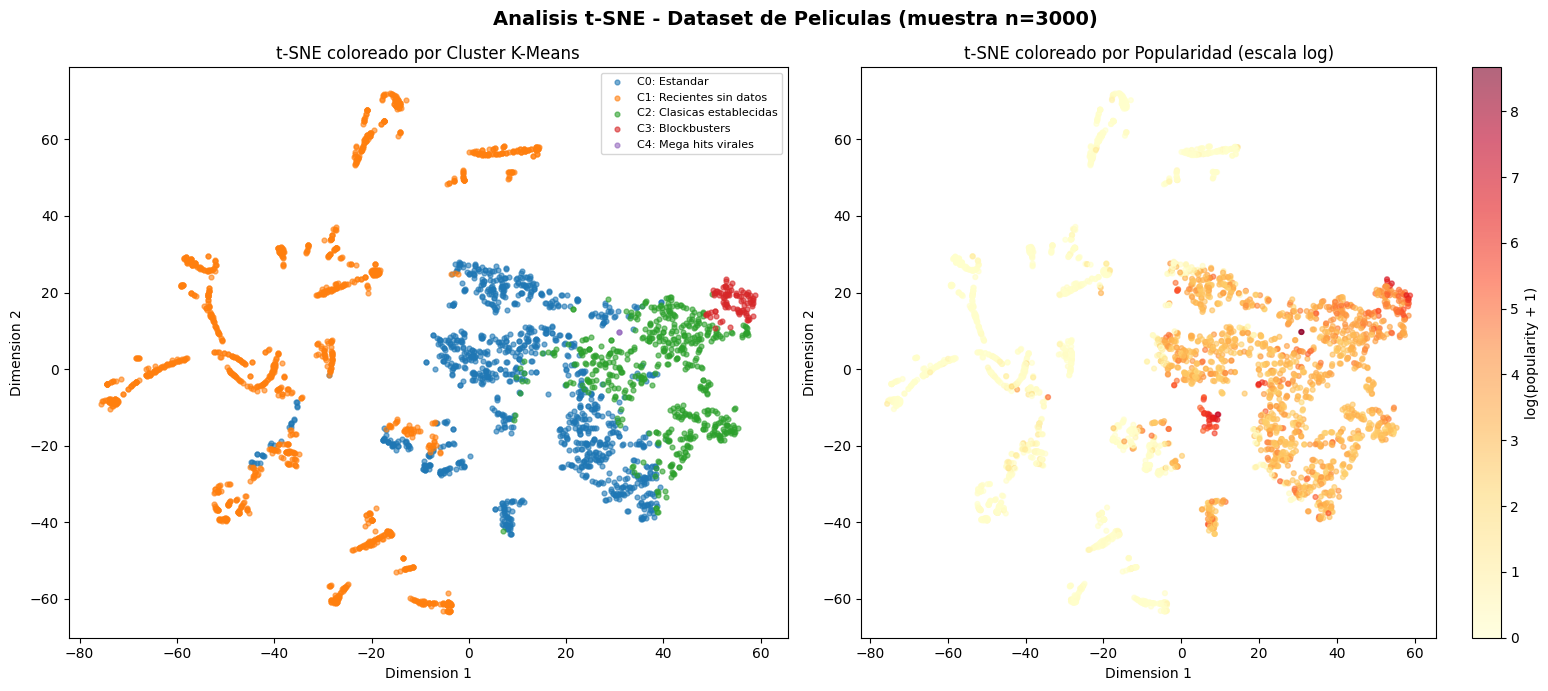

In [68]:
# Visualizacion t-SNE coloreado por cluster K-Means
cluster_names_map = {
    0: "Estandar",
    1: "Recientes sin datos",
    2: "Clasicas establecidas",
    3: "Blockbusters",
    4: "Mega hits virales"
}
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]

fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Plot 1: por cluster
for cluster_id in sorted(cluster_sample.unique()):
    mask = cluster_sample == cluster_id
    axes[0].scatter(tsne_result[mask, 0], tsne_result[mask, 1],
                    c=colors[cluster_id],
                    label=f"C{cluster_id}: {cluster_names_map[cluster_id]}",
                    alpha=0.6, s=12)
axes[0].set_title("t-SNE coloreado por Cluster K-Means", fontsize=12)
axes[0].legend(fontsize=8)
axes[0].set_xlabel("Dimension 1")
axes[0].set_ylabel("Dimension 2")

# Plot 2: por log(popularity)
pop_sample = df_cluster["popularity"].iloc[sample_idx].reset_index(drop=True)
log_pop = np.log1p(pop_sample)
sc = axes[1].scatter(tsne_result[:, 0], tsne_result[:, 1],
                     c=log_pop, cmap="YlOrRd", alpha=0.6, s=12)
plt.colorbar(sc, ax=axes[1], label="log(popularity + 1)")
axes[1].set_title("t-SNE coloreado por Popularidad (escala log)", fontsize=12)
axes[1].set_xlabel("Dimension 1")
axes[1].set_ylabel("Dimension 2")

plt.suptitle("Analisis t-SNE - Dataset de Peliculas (muestra n=3000)", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.savefig("tsne_visualizacion.png", dpi=150, bbox_inches="tight")
plt.show()

### 4.2 Interpretacion de los resultados de t-SNE

**Observaciones principales:**

1. **Separacion de clusters extremos**: Los clusters 3 (Blockbusters) y 4 (Mega hits virales) aparecen como puntos aislados en los extremos de la proyeccion, confirmando que son grupos genuinamente distintos.

2. **Masa central con solapamiento**: Los clusters 0 y 1 forman una nube central con solapamiento, explicando los valores de silueta moderados (~0.33). Estas peliculas comparten multiples caracteristicas similares.

3. **Estructura no lineal revelada**: t-SNE muestra que los datos tienen un gradiente continuo desde peliculas sin datos hasta grandes producciones, no grupos perfectamente separables. Esto es coherente con la naturaleza del mercado cinematografico.

4. **Validacion del clustering**: La proyeccion confirma que los 5 clusters de K-Means capturan grupos reales, ya que los colores se agrupan espacialmente en la proyeccion no lineal.

